Easy to use xarray simulation tool:
https://github.com/jbusecke/xmovie

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy_offlinedata
from datetime import datetime,timedelta
from xmovie import Movie
import matplotlib as mpl
from matplotlib.lines import Line2D

%matplotlib inline

ModuleNotFoundError: No module named 'cartopy_offlinedata'

# Load Data

In [7]:
input_path = '/work/TORI/'

velocity = xr.open_dataset(input_path + 'velocity_raw_filtered.nc')

In [8]:
velocity_daily = velocity.resample(time='5D').mean(dim='time')

# Movie

In [38]:
fig = plt.figure(figsize=(10,10))

def custom_plotfunc(ds,fig,tt,framedim='time',**kwargs):
    ax = fig.subplots(subplot_kw={'projection':ccrs.PlateCarree()})
    ds.isel({framedim:tt}).plot.quiver('lon','lat','u_filtered','v_filtered',ax=ax,scale=15,add_guide=False)
    ax.add_feature(cfeature.LAND, facecolor='grey',edgecolor='black')
    gl = ax.gridlines(draw_labels=True)
    ax.set_title(str(ds.isel(time=tt).time.values)[:10])
    gl.right_labels=False
    gl.top_labels=False
    
    return None,None
    


<Figure size 1000x1000 with 0 Axes>

In [39]:
mov = Movie(velocity_daily,custom_plotfunc,input_check=False)

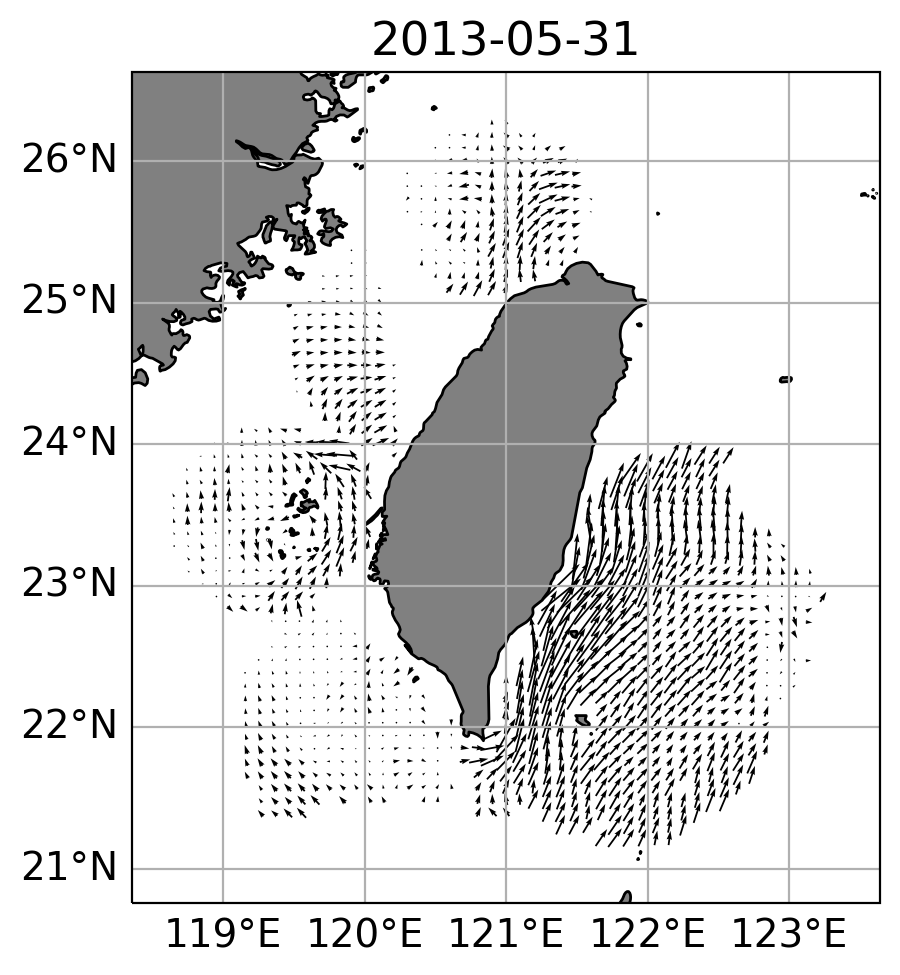

In [40]:
mov.preview(30)

In [45]:
mov.save('movie_TOROS_5d.gif',overwrite_existing=True,gif_framerate=6,gif_resolution_factor=1)

Movie created at movie_TOROS_5d.mp4
GIF created at movie_TOROS_5d.gif
